# Loading and preparing the data

In [8]:
# We first import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
# We now load the titanic data as a CSV
titanic_survival = pd.read_csv('Intro to data analysis.csv')

# Let's have a look at the data
titanic_survival.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# There should be data from 891 passengers
len(titanic_survival)

891

In [7]:
titanic_survival.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# What questions do we want to answer?

What factors made people more likely to survive? My assumption is that there were limited resources to save people and that there were some individuals trying to make decisions (maybe according to some protocol) about who to place on lifeboats first.
I suspect that the following factors may have an influence:
- Age: maybe children were more likely to be saved
- Sex: the same, maybe they were more likely to be saved
- Pclass: this is a proxy of social status and it's supposed to be the reason why Leonardo Di Caprio died in the movie
- parch: ok... if more children were saved, maybe they also saved their parents (specially the mother)
- sibs: maybe if your wife was saved, you were also likely to be saved

Additionally, I am curious also to answer these questions:
- Were there very different rates given the same Pclass. Maybe there were 2-3 top-luxury cabins? Or something similar?
- Were children and women more frequent in certain Pclass?

# Data cleaning

In [15]:
# Let's summarize the columns with numerical values to see if there's anything strange
titanic_survival[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Seems there are some NaN values, let's see how many.
titanic_survival.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
# Cabin and Age seem to have some NaN. Let's explore why
null_age_series = titanic_survival['Age'].isnull()
titanic_survival[null_age_series].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


I did not detect any pattern at first glance so I assume the age was missing in some random cases.

In [48]:
# Let's do the same for the cabin
null_cabin_series = titanic_survival['Cabin'].isnull()
print "Table of number of passengers by class: missing cabin passengers"
print titanic_survival[null_cabin_series].groupby('Pclass')['PassengerId'].count()
print "Table of number of passengers by class: all sampled passengers"
print titanic_survival.groupby('Pclass')['PassengerId'].count()

Table of number of passengers by class: missing cabin passengers
Pclass
1     40
2    168
3    479
Name: PassengerId, dtype: int64
Table of number of passengers by class: missing cabin passengers
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


So it seems that most of the passengers in classes 2 and 3 did not have a cabin assigned. For the time being, this is irrelevant.

# Data Exploration

Let's do some basic quick plots to familiarize ourselves with the data a little bit.

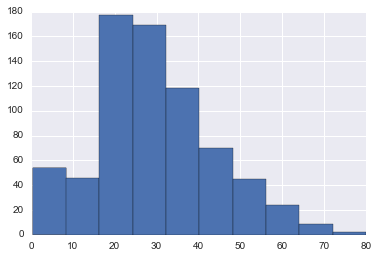

In [59]:
# Let's explore the age
titanic_survival['Age'].hist()

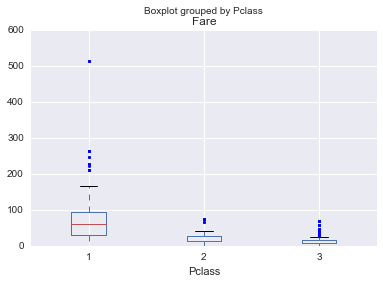

In [72]:
# Let's draw the ticket fares
titanic_survival.boxplot(column = 'Fare', by='Pclass', sym = 'k.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001DB48A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003CA7B898>]], dtype=object)

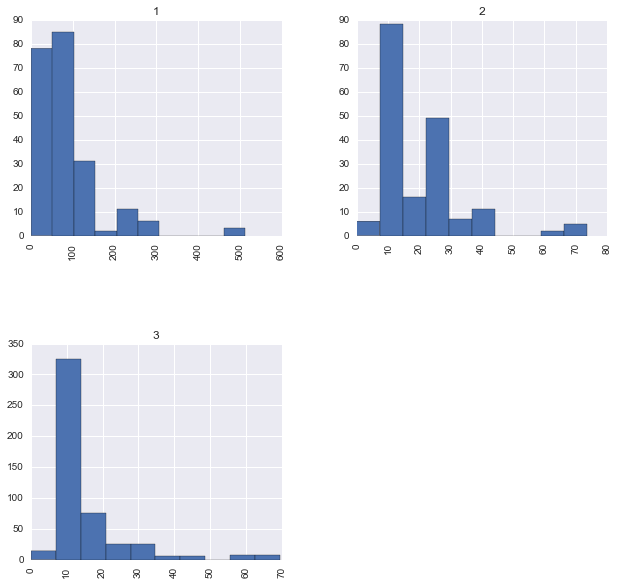

In [102]:
titanic_survival['Fare'].hist(by=titanic_survival['Pclass'], figsize = (10, 10))